### Final Project: Linear Discriminant Analysis for Sedimentological Data

**Introduction**

Textural parameters are quantifiable characteristics that provide significant insights into past depositional energy, source areas, and environmental conditions in sedimentary environments, such as sand dune fields (Folk, 1964). Globally, sand dunes are generally considered among the most consistent sedimentary deposits in terms of textural parameters. However, the sand dunes in the southeastern Pacific region of Oaxaca, Mexico, show notable sedimentological differences compared to other dune fields in the country (Kasper-Zubillaga et al., 2022).

This script performs a Linear Discriminant Analysis (LDA) to evaluate which textural parameters maximize the separability among three dune sites: Concepción (CB), Chipehua (CH), and Playa Azul (PA).

#### *Linear Discriminant Analysis (LDA)*
LDA is a statistical method used to reduce redundant and noisy information from an original dataset, retaining only its essential features (Zhao et al., 2024). This method maximizes the ratio of between-class variance to within-class variance, thereby ensuring maximum class separability (Tharwat et al., 2017).

The LDA procedure typically involves three main steps:

1. Calculate the between-class variance, which measures the separability between different classes (i.e., the distance between the means of the classes).

2. Calculate the within-class variance, which measures the dispersion of samples around their respective class means.

3. Construct a lower-dimensional space that maximizes between-class variance while minimizing within-class variance, allowing the classes to be as distinct as possible in the reduced space.

**Before applying the technique, it is essential to standardize all samples.**

### Performing LDA

1. Importing libraries
- numpy → numerical computations.
- matplotlib.pyplot → visualization.
- train_test_split → splits data into training and testing sets.
- LinearDiscriminantAnalysis → the LDA model.
- accuracy_score, confusion_matrix, classification_report → model evaluation metrics.

In [1]:
# 1. Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

2. Importing and calling textural parameters with a function

In [2]:
def import_csv (file):
    import pandas as pd
    return pd.read_csv (file)

In [3]:
data = "sedimentology.csv"

# Import the file and convert to a dataframe
data_df = import_csv(data)
data = data_df[['mean','sorting','skewness','kurtosis']] #textural parameters
dune = data_df['dune_site'] # dune sites
X = data # Predictable variables
y = dune # Class labels

3. Split data into train/test sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

4. Create and fit the LDA model with the predictable variables and the class labels.

In [5]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=2)

5. Make predictions

y_pred = lda.predict(X_test) → use the trained model for predicting the sample classes

In [6]:
y_pred = lda.predict(X_test)

6. Evaluate model performance

Accuracy:
- greater than 90% → excelent
- 80–90% → good
- 60–80% → acceptable

Accuracy: 0.6521739130434783


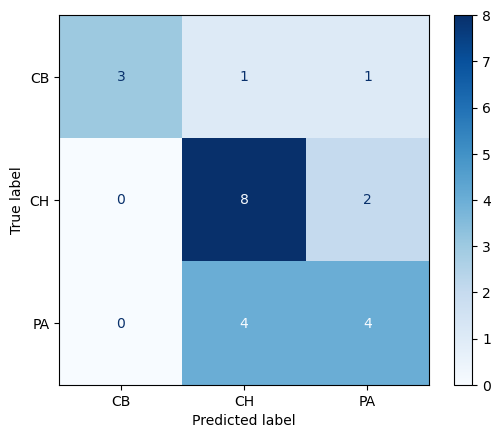


Classification Report:
               precision    recall  f1-score   support

          CB       1.00      0.60      0.75         5
          CH       0.62      0.80      0.70        10
          PA       0.57      0.50      0.53         8

    accuracy                           0.65        23
   macro avg       0.73      0.63      0.66        23
weighted avg       0.68      0.65      0.65        23



In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))



6. Create a table showing how much each variable contributes to each discriminant axis in LDA.

In [8]:
import pandas as pd
def lda_loadings(lda_model, feature_names):
    # Loadings (scalings) tell us how original features map to discriminant axes
    loadings = lda_model.scalings_

    # Number of discriminant axes
    n_axes = loadings.shape[1]

    # Create axis labels: LD1, LD2, ...
    axis_labels = [f"LD{i+1}" for i in range(n_axes)]

    # Building DataFrame
    loadings_df = pd.DataFrame(loadings, 
                               index=feature_names, 
                               columns=axis_labels)
    
    # Add absolute values for easier ranking
    loadings_df["Max_Abs_Loading"] = loadings_df.abs().max(axis=1)
    loadings_df = loadings_df.sort_values("Max_Abs_Loading", ascending=False)

    return loadings_df


                LD1       LD2  Max_Abs_Loading
sorting  -13.238795 -0.906691        13.238795
kurtosis  -9.134709  4.425924         9.134709
skewness  -2.524674 -5.621444         5.621444
mean      -0.573579 -1.877429         1.877429


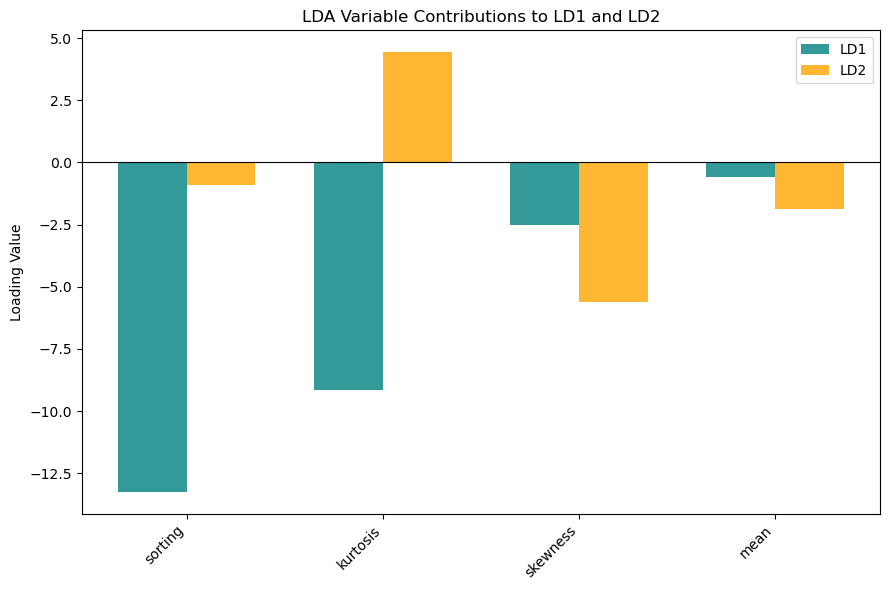

In [9]:
feature_names = ['mean','sorting','skewness','kurtosis']

loadings_table = lda_loadings(lda, feature_names)
print(loadings_table)

# Loadings of LD1 y LD2
ld1 = loadings_table["LD1"]
ld2 = loadings_table["LD2"]
variables = loadings_table.index

# Y ax
x = np.arange(len(variables))
width = 0.35  # ancho de las barras

# Create figure
fig, ax = plt.subplots(figsize=(9,6))

# Bars for each ax
bars1 = ax.bar(x - width/2, ld1, width, label="LD1", color="teal", alpha=0.8)
bars2 = ax.bar(x + width/2, ld2, width, label="LD2", color="orange", alpha=0.8)

# Labels and legend
ax.set_xticks(x)
ax.set_xticklabels(variables, rotation=45, ha="right")
ax.set_ylabel("Loading Value")
ax.set_title("LDA Variable Contributions to LD1 and LD2")
ax.legend()

# Reference line in 0
ax.axhline(0, color="black", linewidth=0.8)

plt.tight_layout()
plt.show()


7. Visualize the LDA transformation (projecting to 2D)

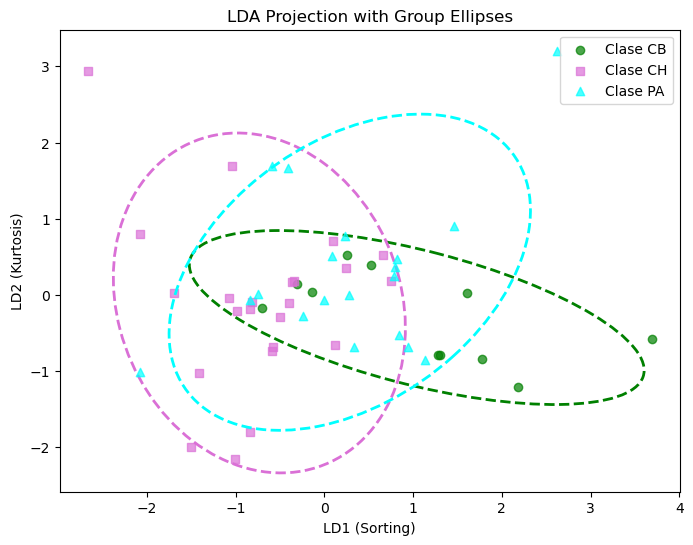

In [10]:
from matplotlib.patches import Ellipse

def plot_cov_ellipse(points, ax, n_std=2.0, edgecolor='black', **kwargs):

    cov = np.cov(points, rowvar=False)
    mean = np.mean(points, axis=0)
    
    # Autovalues y autovectors
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    
    # Rotation angle
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    
    # Elipse
    width, height = 2 * n_std * np.sqrt(vals)
    ellipse = Ellipse(mean, width, height, angle=theta, edgecolor=edgecolor, fill=False, **kwargs)
    ax.add_patch(ellipse)

X_lda = lda.transform(X_train)
fig, ax = plt.subplots(figsize=(8,6))

for label, marker, color in zip(np.unique(y_train), ('o', 's', '^'), ('green','orchid','cyan')):
    points = X_lda[y_train == label]
    ax.scatter(points[:, 0], points[:, 1], marker=marker, color=color, alpha=0.7, label=f"Clase {label}")
    plot_cov_ellipse(points, ax, edgecolor=color, linewidth=2, linestyle="--")

ax.set_xlabel("LD1 (Sorting)")
ax.set_ylabel("LD2 (Kurtosis)")
ax.set_title("LDA Projection with Group Ellipses")
ax.legend()
plt.show()



### **Conclusion**

The model performs moderately well (65% accuracy).

- CB is the most reliable class in terms of precision, but with low coverage (some samples are missed).
- CH is the best detected (high recall), but it absorbs errors from other classes.
- PA is the most problematic, with low precision and recall → it is too similar to CH, and the model fails to distinguish them properly.

The model performs moderately well, showing that the three dune localities can be partially separated by the two most significant variables (sorting and kurtosis). Among the sites, it is likely that Chipehua (CH) and Playa Azul (PA) are related, while Concepción Bamba (CB) is mainly distinguished by its sorting values.

Overall, LDA proves useful for separating groups, but for this dataset, it was not the optimal method to fully understand the sedimentological variability.

### **References**

Folk, R. L. (1966). A review of grain‐size parameters. Sedimentology, 6(2), 73-93.

Kasper-Zubillaga, J. J., Arellano-Torres, E., Álvarez-Sánchez, L. F., Delgado, L. C., Martínez-Serrano, R. G., & Baltazar-Jiménez, P. A. E. (2022). Implications of polymodal distributions in the grain size parameters of coastal dune sands (Oaxaca, Mexico). Sedimentary Geology, 437, 106189.

Tharwat, A., Gaber, T., Ibrahim, A., & Hassanien, A. E. (2017). Linear discriminant analysis: A detailed tutorial. AI communications, 30(2), 169-190.

Zhao, S., Zhang, B., Yang, J., Zhou, J., & Xu, Y. (2024). Linear discriminant analysis. Nature Reviews Methods Primers, 4(1), 70.
